<a href="https://colab.research.google.com/github/bukolastella/Data-Science/blob/master/Data-Science/Deep%20Learning/from%20tensorflow/caltech101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

In [ ]:
df,info = tfds.load('caltech101', with_info=True, as_supervised= True )

In [ ]:
df

{'test': <DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>,
 'train': <DatasetV1Adapter shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>}

In [ ]:
train_data = df['train']
test_data = df['test']

In [ ]:
valid_data, train_data = tfds.load('caltech101', split = ['train[:10%]', 'train[10%:]'], as_supervised = True)

**IMAGES**


In [ ]:
class_names = info.features["label"].names

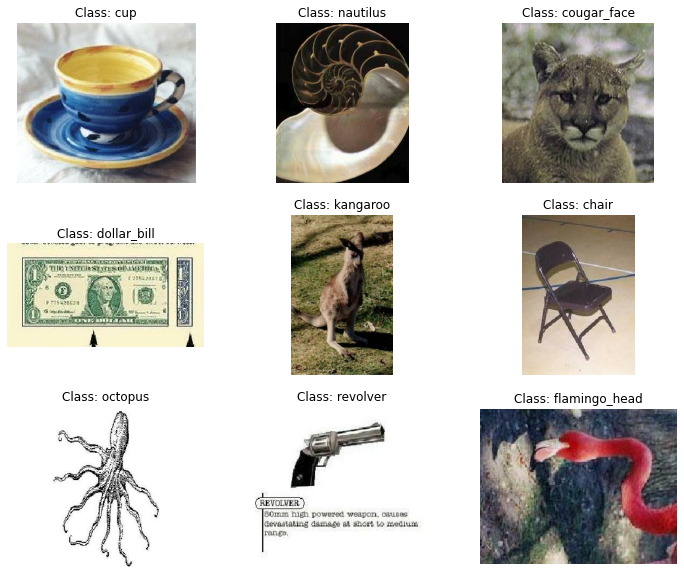

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
index = 0
for image, label in train_data.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

**PREPROCESS**

In [ ]:
#preprocess
def preprocess(image, labels):
  image = tf.cast(image, tf.float32)
  image /= 255.
  image = tf.image.resize(image, (150,150))
  return image, labels

In [ ]:
train_data = train_data.map(preprocess).batch(1028).prefetch(1)
test_data = test_data.map(preprocess).batch(1028).prefetch(1)
valid_data = valid_data.map(preprocess).batch(1028).prefetch(1)

In [ ]:
train_data

<DatasetV1Adapter shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
#in order to be able to apply data augmentation
train_image, train_label = next(iter(train_data))
test_image, test_label = next(iter(test_data))
valid_image, valid_label = next(iter(valid_data))

In [ ]:
train_data

<DatasetV1Adapter shapes: ((None, 150, 150, 3), (None,)), types: (tf.float32, tf.int64)>

In [ ]:
train_label

<tf.Tensor: shape=(1028,), dtype=int64, numpy=array([27, 67, 22, ..., 62, 28, 62])>

In [ ]:
train_label.shape

TensorShape([1028])

In [ ]:
train_image.shape

TensorShape([1028, 150, 150, 3])

In [ ]:
#s = tf.reshape(train_data, [])

**DATA AUGMENTATION**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator( horizontal_flip=True, vertical_flip=True, width_shift_range= 0.1, height_shift_range=0.1 )
it_gen = datagen.flow(train_image, train_label, batch_size = 1028)

**MODEL**

In [ ]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = Sequential([
                    Conv2D(32, 3, padding='same',  activation='relu',kernel_initializer='he_uniform', input_shape = [150, 150, 3]),
                    MaxPooling2D(2),
                    Conv2D(32, 3, padding='same', kernel_initializer='he_uniform', activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same', kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(64, 3, padding='same', kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(128, 3, padding='same', kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Conv2D(128, 3, padding='same', kernel_initializer='he_uniform',activation='relu'),
                    MaxPooling2D(2),
                    Flatten(),
                    Dense(128, kernel_initializer='he_uniform',activation = 'relu'),
                    Dense(102, activation = 'softmax'),
                    ])
 

In [ ]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_190 (Conv2D)          (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d_185 (MaxPoolin (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_191 (Conv2D)          (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_186 (MaxPoolin (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_192 (Conv2D)          (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_187 (MaxPoolin (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_193 (Conv2D)          (None, 18, 18, 64)      

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-3), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
steps = int(train_image.shape[0] / 32)
history = model.fit(train_image, train_label, epochs = 20, validation_data= (valid_image, valid_label) ,  verbose = 2)

Epoch 1/20
33/33 - 1s - loss: 4.6691 - accuracy: 0.0097 - val_loss: 4.6256 - val_accuracy: 0.0065
Epoch 2/20
33/33 - 1s - loss: 4.6182 - accuracy: 0.0107 - val_loss: 4.6260 - val_accuracy: 0.0033
Epoch 3/20
33/33 - 1s - loss: 4.5976 - accuracy: 0.0175 - val_loss: 4.6362 - val_accuracy: 0.0065
Epoch 4/20
33/33 - 1s - loss: 4.5369 - accuracy: 0.0224 - val_loss: 4.7660 - val_accuracy: 0.0229
Epoch 5/20
33/33 - 1s - loss: 4.4388 - accuracy: 0.0350 - val_loss: 4.4661 - val_accuracy: 0.0719
Epoch 6/20
33/33 - 1s - loss: 4.2597 - accuracy: 0.0710 - val_loss: 4.3968 - val_accuracy: 0.0752
Epoch 7/20
33/33 - 1s - loss: 4.0240 - accuracy: 0.0953 - val_loss: 4.5371 - val_accuracy: 0.0752
Epoch 8/20
33/33 - 1s - loss: 3.7948 - accuracy: 0.1508 - val_loss: 4.5497 - val_accuracy: 0.0588
Epoch 9/20
33/33 - 1s - loss: 3.5184 - accuracy: 0.2004 - val_loss: 4.4089 - val_accuracy: 0.1176
Epoch 10/20
33/33 - 1s - loss: 3.0767 - accuracy: 0.2626 - val_loss: 4.6400 - val_accuracy: 0.1144
Epoch 11/20
33/33 -

In [ ]:
n_classes = info.features["label"].num_classes

In [ ]:
n_classes

102

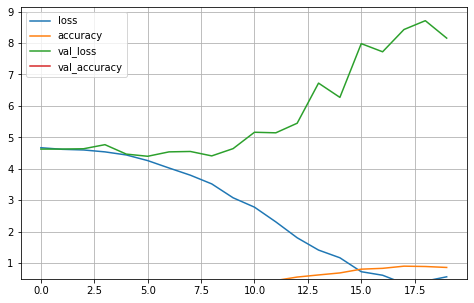

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,5)

plt.show()

In [ ]:
base_model = keras.applications.xception.Xception(weights="imagenet",
 include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)


In [ ]:
for layer in base_model.layers:
 layer.trainable = False

In [ ]:
model.compile(optimizer = optimizers.Adam(1e-3), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_image, train_label, epochs = 20, validation_data= (valid_image, valid_label) ,  verbose = 2)

Epoch 1/20
33/33 - 3s - loss: 3.3704 - accuracy: 0.3512 - val_loss: 1.6428 - val_accuracy: 0.6961
Epoch 2/20
33/33 - 2s - loss: 0.6917 - accuracy: 0.8930 - val_loss: 1.0001 - val_accuracy: 0.7712
Epoch 3/20
33/33 - 2s - loss: 0.2824 - accuracy: 0.9805 - val_loss: 0.8792 - val_accuracy: 0.7941
Epoch 4/20
33/33 - 2s - loss: 0.1692 - accuracy: 0.9893 - val_loss: 0.8223 - val_accuracy: 0.7941
Epoch 5/20
33/33 - 2s - loss: 0.1126 - accuracy: 0.9961 - val_loss: 0.7987 - val_accuracy: 0.7843
Epoch 6/20
33/33 - 2s - loss: 0.0814 - accuracy: 0.9981 - val_loss: 0.7767 - val_accuracy: 0.8007
Epoch 7/20
33/33 - 2s - loss: 0.0624 - accuracy: 0.9981 - val_loss: 0.7676 - val_accuracy: 0.7974
Epoch 8/20
33/33 - 2s - loss: 0.0496 - accuracy: 1.0000 - val_loss: 0.7559 - val_accuracy: 0.7941
Epoch 9/20
33/33 - 2s - loss: 0.0402 - accuracy: 1.0000 - val_loss: 0.7491 - val_accuracy: 0.7974
Epoch 10/20
33/33 - 2s - loss: 0.0337 - accuracy: 1.0000 - val_loss: 0.7452 - val_accuracy: 0.7974
Epoch 11/20
33/33 -

In [ ]:
for layer in base_model.layers:
 layer.trainable = True


In [ ]:
model.compile(optimizer = optimizers.Adam(1e-4), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping_cb  = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [ ]:
history = model.fit(train_image, train_label, epochs = 100, validation_data= (valid_image, valid_label) , callbacks= early_stopping_cb, verbose = 2)

Epoch 1/100
33/33 - 9s - loss: 0.6959 - accuracy: 0.9426 - val_loss: 0.7227 - val_accuracy: 0.8268
Epoch 2/100
33/33 - 9s - loss: 0.1262 - accuracy: 0.9942 - val_loss: 0.6406 - val_accuracy: 0.8431
Epoch 3/100
33/33 - 9s - loss: 0.0572 - accuracy: 0.9981 - val_loss: 0.6041 - val_accuracy: 0.8464
Epoch 4/100
33/33 - 9s - loss: 0.0373 - accuracy: 0.9990 - val_loss: 0.6077 - val_accuracy: 0.8464
Epoch 5/100
33/33 - 9s - loss: 0.0285 - accuracy: 0.9990 - val_loss: 0.6105 - val_accuracy: 0.8333
Epoch 6/100
33/33 - 9s - loss: 0.0255 - accuracy: 1.0000 - val_loss: 0.6264 - val_accuracy: 0.8333
Epoch 7/100
33/33 - 9s - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.6593 - val_accuracy: 0.8235
Epoch 8/100
33/33 - 9s - loss: 0.0278 - accuracy: 0.9981 - val_loss: 0.6173 - val_accuracy: 0.8301
Epoch 9/100
33/33 - 9s - loss: 0.0185 - accuracy: 1.0000 - val_loss: 0.6023 - val_accuracy: 0.8301
Epoch 10/100
33/33 - 9s - loss: 0.0139 - accuracy: 1.0000 - val_loss: 0.5950 - val_accuracy: 0.8366
Epoch 11/

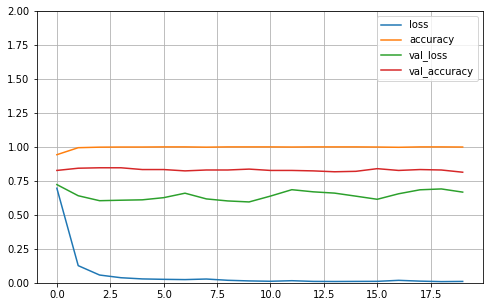

In [ ]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()